# prepare

In [1]:
"""
Visualize three pictures of samples in the training dataset
"""
import argparse
import os
import random
import warnings

import torch
# import torch.backends.cudnn as cudnn
# import torch.distributed as dist
# import torch.multiprocessing as mp
# import torch.nn as nn
# import torch.nn.parallel
import torch.optim
import torch.utils.data
import torch.utils.data.distributed
import torchvision.datasets as datasets
import numpy as np
# import torchvision.models as models
import torchvision.transforms as transforms
# from torch.utils.tensorboard import SummaryWriter


# from utils import adjust_learning_rate
# from utils import save_checkpoint
# from utils import train
# from utils import validate
# from utils import Cutout

# data loader

## baseline

In [2]:
# Data loading code
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
transform_train=transforms.Compose([
        # 剪裁成224
        transforms.Resize(224),
        # 中心对称
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize,
    ])
train_dataset = datasets.CIFAR100(
    root="dataset",
    download=True,
    train=True,
    transform=transform_train)
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=3, shuffle=False,num_workers=4, pin_memory=True)

Files already downloaded and verified


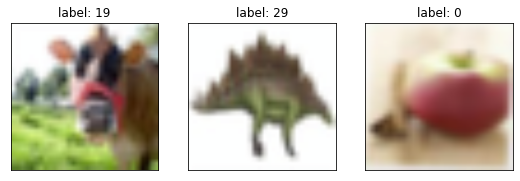

In [3]:
import matplotlib.pyplot as plt
for _, (images, target) in enumerate(train_loader):
    ids = len(images)
    fig = plt.figure(figsize=(ids * 3,4))
    for i in range(ids):
        ax = fig.add_subplot(1,ids,i+1,xticks=[],yticks=[])
        npimg = images[i].cpu().numpy().transpose(1,2,0) #交换维度，从GBR换成RGB
        # 还原至标准化之前
        npimg = npimg * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]
        npimg = np.clip(npimg,0,1)
        plt.imshow(npimg)
        title = "label: {}".format(target[i].cpu().numpy())
        ax.set_title(title)
    plt.show()
    break
        

## mixup

In [4]:
from utils import mixup_data

/usr/local/miniconda3/envs/py38/lib/python3.8/site-packages/apex/pyprof/__init__.py:5: FutureWarning: pyprof will be removed by the end of June, 2022
  warnings.warn("pyprof will be removed by the end of June, 2022", FutureWarning)


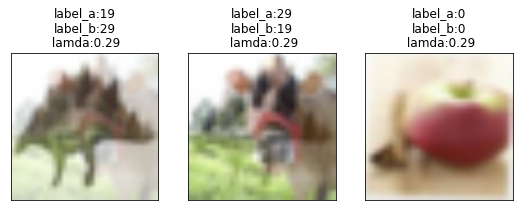

In [5]:
for _, (images, target) in enumerate(train_loader):
    images, targets_a, targets_b, lam = mixup_data(images, target, 1)
    ids = len(images)
    fig = plt.figure(figsize=(ids * 3,4))
    for i in range(ids):
        ax = fig.add_subplot(1,ids,i+1,xticks=[],yticks=[])
        npimg = images[i].cpu().numpy().transpose(1,2,0) #交换维度，从GBR换成RGB
        # 还原至标准化之前
        npimg = npimg * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]
        npimg = np.clip(npimg,0,1)
        plt.imshow(npimg)
        title = "label_a:{}\nlabel_b:{}\n lamda:{:.2f}".format(targets_a[i].cpu().numpy(),targets_b[i].cpu().numpy(),lam)
        ax.set_title(title)
    plt.show()
    break



## cutmix

In [6]:
from utils import cutmix_data

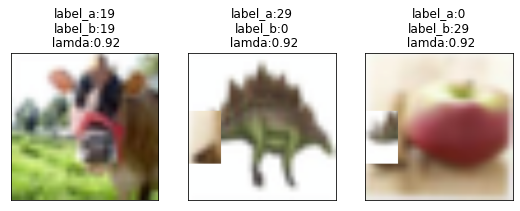

In [7]:
for _, (images, target) in enumerate(train_loader):
    images, targets_a, targets_b, lam = cutmix_data(images, target, 1)
    ids = len(images)
    fig = plt.figure(figsize=(ids * 3,4))
    for i in range(ids):
        ax = fig.add_subplot(1,ids,i+1,xticks=[],yticks=[])
        npimg = images[i].cpu().numpy().transpose(1,2,0) #交换维度，从GBR换成RGB
        # 还原至标准化之前
        npimg = npimg * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]
        npimg = np.clip(npimg,0,1)
        plt.imshow(npimg)
        title = "label_a:{}\nlabel_b:{}\n lamda:{:.2f}".format(targets_a[i].cpu().numpy(),targets_b[i].cpu().numpy(),lam)
        ax.set_title(title)
    plt.show()
    break


## cutout

In [8]:
from utils import Cutout
transform_train=transforms.Compose([
        # 剪裁成224
        transforms.Resize(224),
        # 中心对称
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize,
    ])
transform_train.transforms.append(Cutout(n_holes=1, length=50))
train_dataset_out = datasets.CIFAR100(
    root="dataset",
    download=True,
    train=True,
    transform=transform_train)
train_loader_out = torch.utils.data.DataLoader(
    train_dataset_out, batch_size=3, shuffle=False,num_workers=4, pin_memory=True)

Files already downloaded and verified


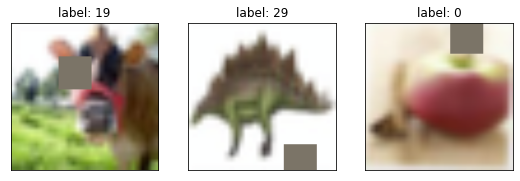

In [9]:
for _, (images, target) in enumerate(train_loader_out):
    ids = len(images)
    fig = plt.figure(figsize=(ids * 3,4))
    for i in range(ids):
        ax = fig.add_subplot(1,ids,i+1,xticks=[],yticks=[])
        npimg = images[i].cpu().numpy().transpose(1,2,0) #交换维度，从GBR换成RGB
        # 还原至标准化之前
        npimg = npimg * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]
        npimg = np.clip(npimg,0,1)
        plt.imshow(npimg)
        title = "label: {}".format(target[i].cpu().numpy())
        ax.set_title(title)
    plt.show()
    break